In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:

df = pd.read_csv('model_results.csv')

df = df.drop(["fit_time",'score_time'], axis=1)

df = df.drop([6, 13, 20, 27, 34], axis=0)

df = df.reset_index(drop=True)



In [5]:
logistic_regression = (df.iloc[:6].copy(),"Logistic regression")
random_forest = (df.iloc[6:12].copy(),"Random forest")
svm = (df.iloc[12:18].copy(),"SVM")
knn = (df.iloc[18:24].copy(),"KNN")
lightgbm = (df.iloc[24:30].copy(),"LightGBM")
xgboost = (df.iloc[30:46].copy(),"XGBoost")

In [6]:
def make_heatmap(data, ax):
    dataset, model_name = data
    numeric_columns = ['test_AUC', 'test_Accuracy', 'test_f1', 'test_Recall',
                       'test_Precision', 'test_MCC', 'test_Average Precision', 'test_Sensitivity',
                       'test_Specificity']

    dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Round the float values in the DataFrame
    dataset[numeric_columns] = dataset[numeric_columns].round(2)
    dataset.set_index('dataset_name', inplace=True)

    dataset = dataset.drop(["best_params"], axis=1)

    # Create the heatmap
    sns.heatmap(dataset, cmap="crest", annot=True, linewidths=.5, ax=ax)

    # Add the model name to the title
    ax.set_title(f'{model_name} Performance Metrics Heatmap')
    

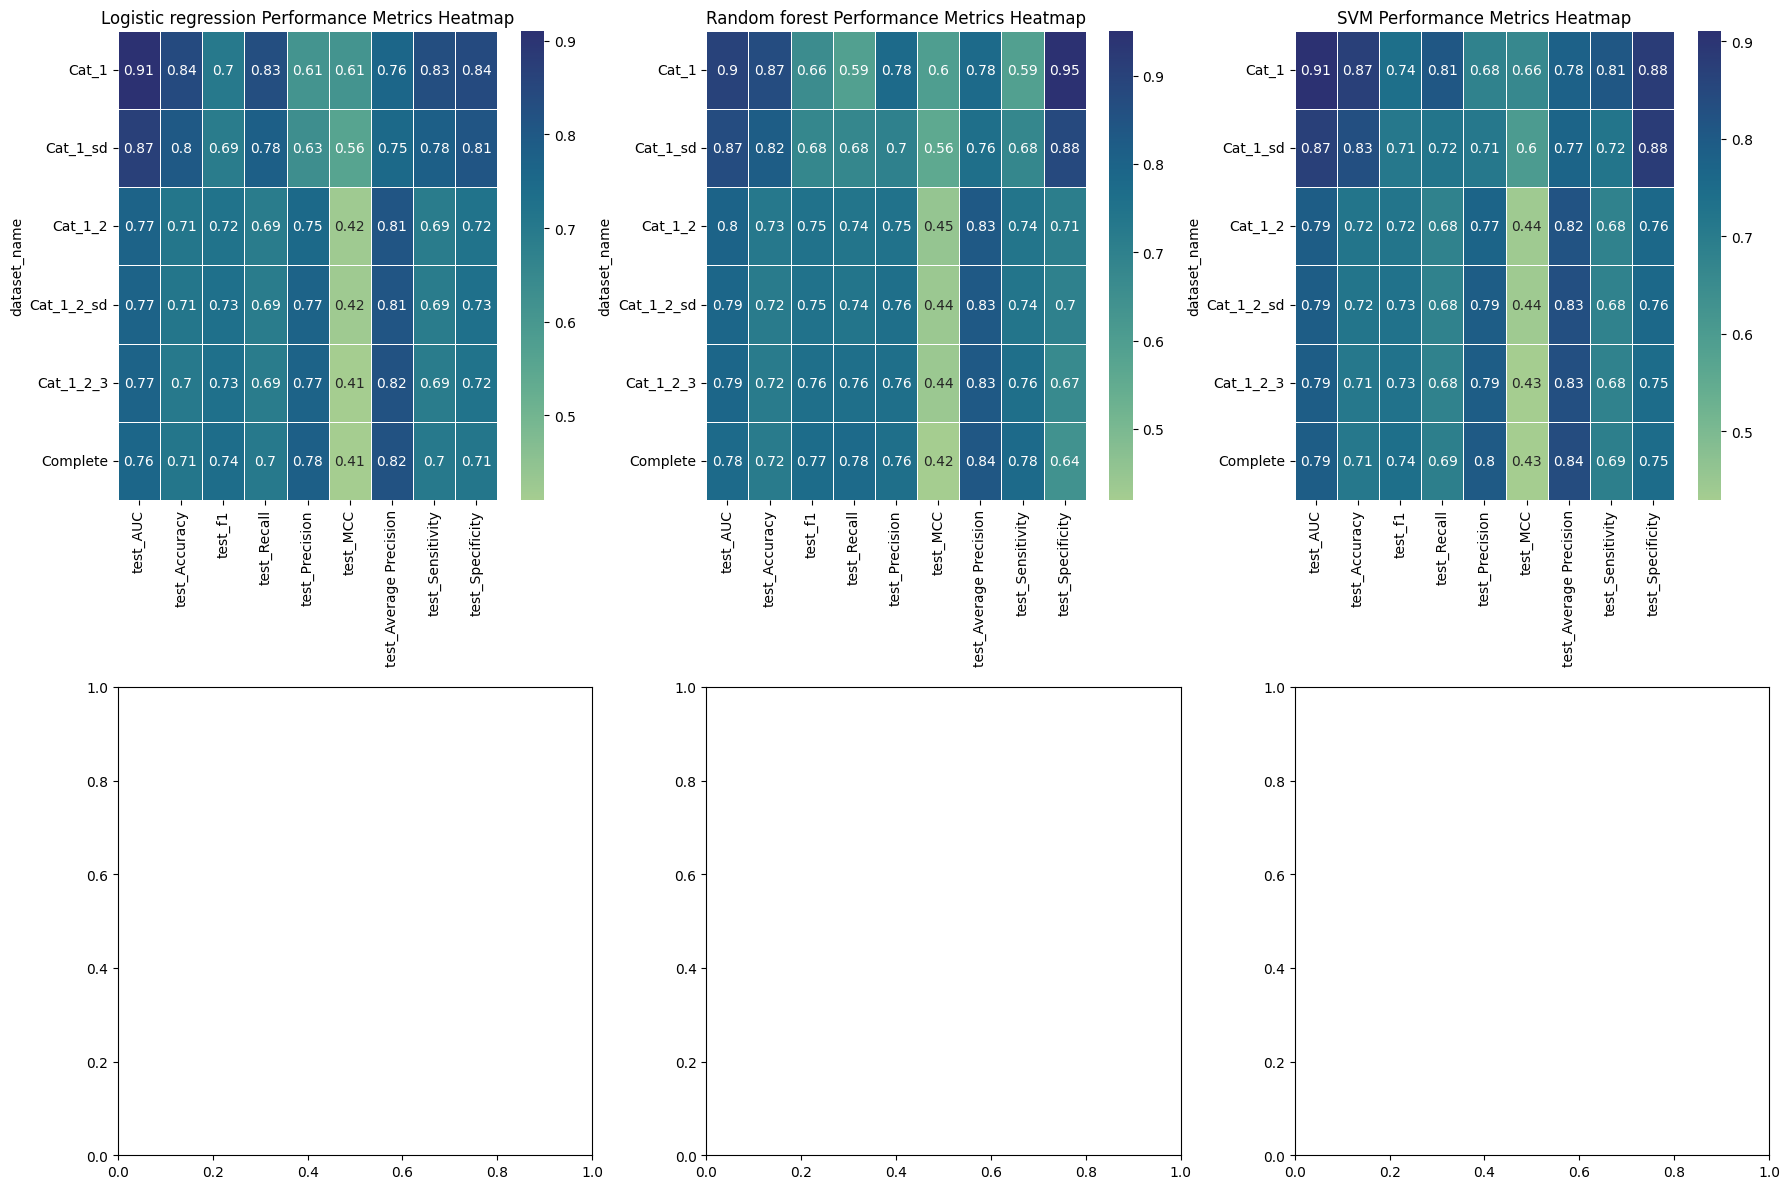

In [7]:
data_list = [logistic_regression, random_forest, svm, knn, lightgbm, xgboost]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

axes = axes.flatten()

for data, ax in zip(data_list, axes):
    make_heatmap(data, ax=ax)  # Pass ax as an argument

plt.tight_layout()
plt.show()
